In [2]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import math
import time
from matplotlib.dates import MonthLocator, WeekdayLocator, WEEKLY, DateFormatter,rrulewrapper, RRuleLocator
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline

pd.options.display.max_columns = 100


Using TensorFlow backend.


## Weekly

In [3]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df.tail()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
489626,20180000320209,08/28/2018,8.0,08/28/2018,124.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,SOUTH,R,R1,MID BEACON HILL
489627,20180000320316,08/28/2018,0.0,08/28/2018,322.0,CAR PROWL,THEFT-LICENSE PLATE,SOUTHWEST,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS
489628,20180000320203,08/28/2018,0.0,08/28/2018,57.0,AGGRAVATED ASSAULT,ASSLT-AGG-BODYFORCE,NORTH,L,L3,LAKECITY
489629,20070000430946,NaN,NaN,01/01/2007,NaN,RAPE,RAPE-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
489630,19990000333737,NaN,NaN,01/01/1999,NaN,THEFT-SHOPLIFT,THEFT-SHOPLIFT,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') & (df['date'] < '2018-12-31')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
dfw=dfw[1:]
dfw=dfw[:-1]
series = dfw['Crime Subcategory']
dfw.rename(columns={'Crime Subcategory': 'number_crimes'}, inplace=True)
dfw

,number_crimes
date,
2008-01-13,787
2008-01-20,743
2008-01-27,718
2008-02-03,657
2008-02-10,689
2008-02-17,755
2008-02-24,783
2008-03-02,786
2008-03-09,742


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    plt.figure(figsize=[18,4]) 
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [5]:
dfw_train=dfw[:-150]
test_stationarity(Series(dfw_train['number_crimes']))

NameError: name 'test_stationarity' is not defined

In [ ]:
dfw_train=dfw[:-150]
test_stationarity(Series(dfw_train['number_crimes']))

Epoch 1/100
404/404 [==============================] - 2s 6ms/step - loss: 0.0735
Epoch 2/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0703
Epoch 3/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0689
Epoch 4/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0680
Epoch 5/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0672
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0664
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0657
Epoch 8/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0650A: 0s - loss: 
Epoch 9/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0642
Epoch 10/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0636
Epoch 11/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0631
Epoch 12/100
404/404 [==============================] - 1s 3ms/step - loss: 0.0629

<Figure size 432x288 with 0 Axes>

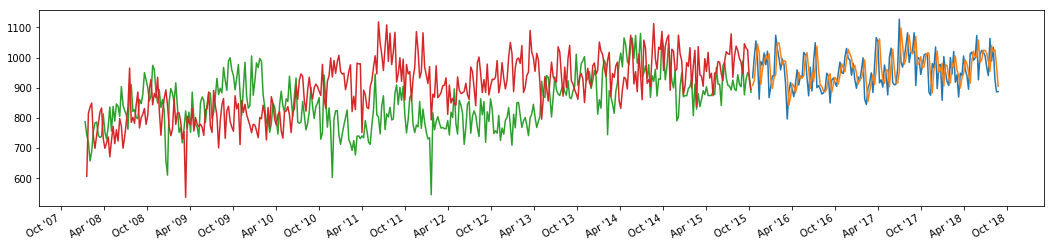

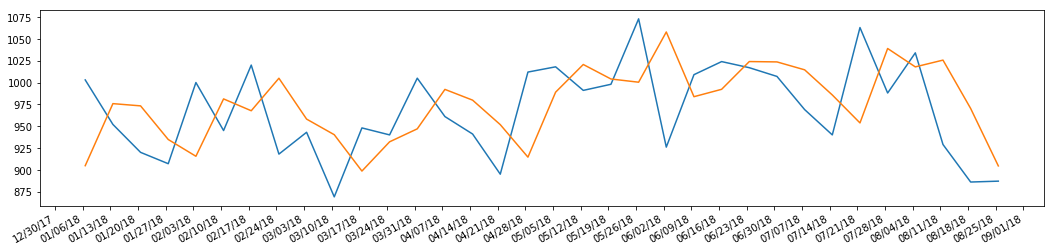

In [73]:
#LSTM with regression framing and stationarity

np.random.seed(7)

def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, 1, X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1)
    return model

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# transform data to be stationary
raw_values = dataset
diff_values = difference(raw_values, 1)

supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split into train and test sets
train, test = supervised_values[0:-150], supervised_values[-150:]

# normalize the dataset
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i+1]
    print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train = list()
for i in range(len(train_scaled)):
    # make one-step forecast
    X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
    yhat_train = forecast_lstm(lstm_model, 1, X_train)
    # invert scaling
    yhat_train = invert_scale(scaler, X_train, yhat_train)
    # invert differencing
    yhat_train = inverse_difference(raw_values, yhat_train, len(train_scaled)+1-i)
    # store forecast
    predictions_train.append(yhat_train)
    expected = series.values[i]
    
# report performance
trainScore = sqrt(mean_squared_error(raw_values[1:-150], predictions_train)) 
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(raw_values[-150:], predictions))
print('Test Score: %.3f RMSE' % (testScore))

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-') #test true
ax.plot_date(dfw.index[-150:],predictions, '-') #test predict
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',) # train 
ax.plot_date(dfw.index[1:-150],predictions_train, '-') #train predict !!!!!!
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()

#2018 Only
rule = rrulewrapper(WEEKLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-')
ax.plot_date(dfw.index[-34:],predictions[-34:], '-')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()


Week=1, Predicted=915.707915, Expected=933.000000
Week=2, Predicted=942.300817, Expected=1000.000000
Week=3, Predicted=975.724353, Expected=1055.000000
Week=4, Predicted=1004.057298, Expected=987.000000
Week=5, Predicted=979.992173, Expected=862.000000
Week=6, Predicted=948.799843, Expected=987.000000
Week=7, Predicted=1007.816526, Expected=975.000000
Week=8, Predicted=974.435460, Expected=1015.000000
Week=9, Predicted=970.556496, Expected=976.000000
Week=10, Predicted=987.262938, Expected=1021.000000
Week=11, Predicted=1009.138178, Expected=867.000000
Week=12, Predicted=944.165315, Expected=903.000000
Week=13, Predicted=946.544288, Expected=939.000000
Week=14, Predicted=960.528143, Expected=939.000000
Week=15, Predicted=919.013391, Expected=1074.000000
Week=16, Predicted=1020.620641, Expected=1029.000000
Week=17, Predicted=1002.546430, Expected=998.000000
Week=18, Predicted=993.656697, Expected=959.000000
Week=19, Predicted=1013.469587, Expected=995.000000
Week=20, Predicted=1010.1069

<Figure size 432x288 with 0 Axes>

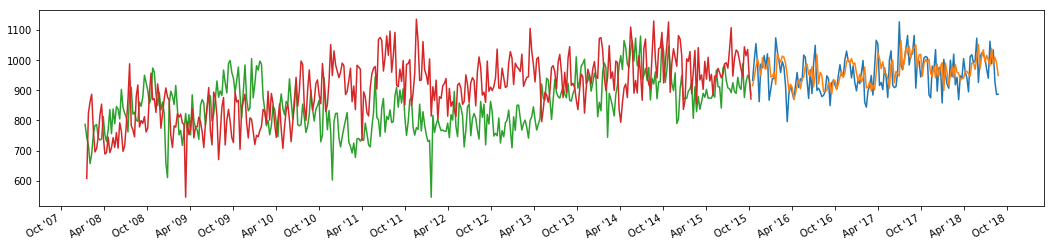

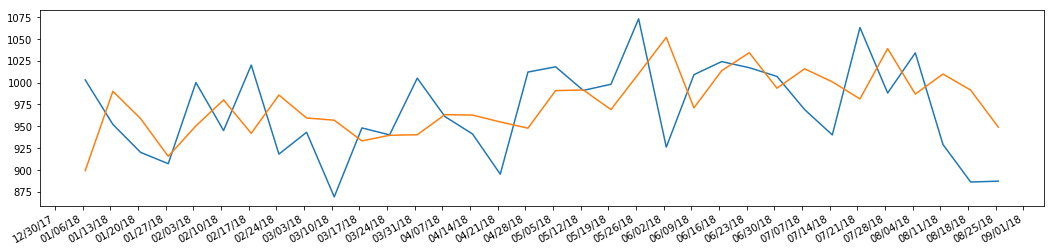

In [77]:
# LSTM with window regression framing and stationarity
# np.random.seed(7)

# def timeseries_to_supervised(data, lag=1):
# 	df = DataFrame(data)
# 	columns = [df.shift(i) for i in range(1, lag+1)]
# 	columns.append(df)
# 	df = concat(columns, axis=1)
# 	df.fillna(0, inplace=True)
# 	return df
 
# # create a differenced series
# def difference(dataset, interval=1):
# 	diff = list()
# 	for i in range(interval, len(dataset)):
# 		value = dataset[i] - dataset[i - interval]
# 		diff.append(value)
# 	return Series(diff)

# # invert differenced value
# def inverse_difference(history, yhat, interval=1):
# 	return yhat + history[-interval]

# # scale train and test data to [-1, 1]
# def scale(train, test):
# 	# fit scaler
# 	scaler = MinMaxScaler(feature_range=(-1, 1))
# 	scaler = scaler.fit(train)
# 	# transform train
# 	train = train.reshape(train.shape[0], train.shape[1])
# 	train_scaled = scaler.transform(train)
# 	# transform test
# 	test = test.reshape(test.shape[0], test.shape[1])
# 	test_scaled = scaler.transform(test)
# 	return scaler, train_scaled, test_scaled

# # fit an LSTM network to training data
# def fit_lstm(train, batch_size, nb_epoch, neurons):
#     X, y = train[:, 0:-1], train[:, -1]
#     X = X.reshape(X.shape[0], 1, X.shape[1])
#     model = Sequential()
#     model.add(LSTM(neurons, batch_input_shape=(batch_size, 1, X.shape[2])))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1)
#     return model

# # inverse scaling for a forecasted value
# def invert_scale(scaler, X, value):
# 	new_row = [x for x in X] + [value]
# 	array = np.array(new_row)
# 	array = array.reshape(1, len(array))
# 	inverted = scaler.inverse_transform(array)
# 	return inverted[0, -1]

# # make a one-step forecast
# def forecast_lstm(model, batch_size, X):
# 	X = X.reshape(1, 1, len(X))
# 	yhat = model.predict(X, batch_size=batch_size)
# 	return yhat[0,0]

# # transform data to be stationary
# raw_values = dataset
# diff_values = difference(raw_values, 1)

# supervised = timeseries_to_supervised(diff_values, 3)
# supervised_values = supervised.values

# # split into train and test sets
# train, test = supervised_values[0:-150], supervised_values[-150:]

# # normalize the dataset
# scaler, train_scaled, test_scaled = scale(train, test)

# # fit the model
# lstm_model = fit_lstm(train_scaled, 1, 100, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0:3].reshape(len(train_scaled), 1, 3)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i+1]
    print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train = list()
for i in range(len(train_scaled)):
    # make one-step forecast
    X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
    yhat_train = forecast_lstm(lstm_model, 1, X_train)
    # invert scaling
    yhat_train = invert_scale(scaler, X_train, yhat_train)
    # invert differencing
    yhat_train = inverse_difference(raw_values, yhat_train, len(train_scaled)+1-i)
    # store forecast
    predictions_train.append(yhat_train)
    expected = series.values[i]
    
# report performance
trainScore = sqrt(mean_squared_error(raw_values[1:-150], predictions_train)) 
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(raw_values[-150:], predictions))
print('Test Score: %.3f RMSE' % (testScore))

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-') #test true
ax.plot_date(dfw.index[-150:],predictions, '-') #test predict
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',) # train 
ax.plot_date(dfw.index[1:-150],predictions_train, '-') #train predict !!!!!!
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()

#2018 Only
rule = rrulewrapper(WEEKLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-')
ax.plot_date(dfw.index[-34:],predictions[-34:], '-')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()


Epoch 1/100
404/404 [==============================] - 4s 9ms/step - loss: 0.0738
Epoch 2/100
404/404 [==============================] - 2s 5ms/step - loss: 0.0706
Epoch 3/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0690
Epoch 4/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0680
Epoch 5/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0669
Epoch 6/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0658
Epoch 7/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0647
Epoch 8/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0632
Epoch 9/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0608
Epoch 10/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0579
Epoch 11/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0551A: 0s 
Epoch 12/100
404/404 [==============================] - 2s 4ms/step - loss: 0.0536
Epoch 1

<Figure size 432x288 with 0 Axes>

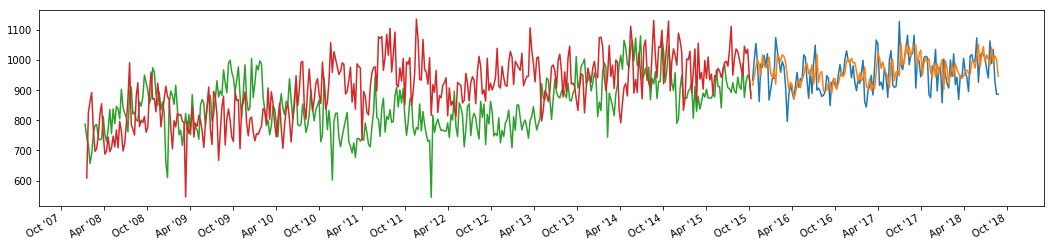

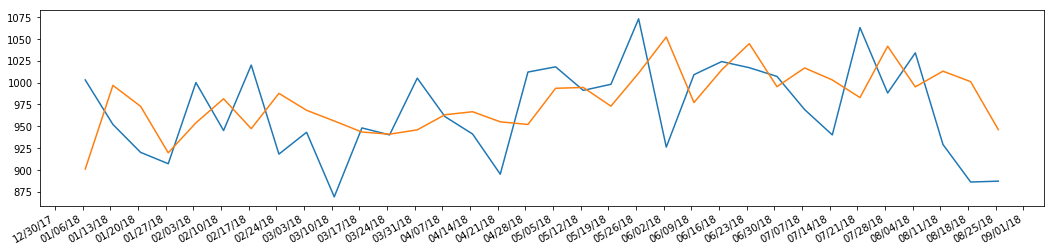

In [84]:
# LSTM with timestep window regression framing and stationarity
np.random.seed(7)

def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1] )
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size,1, X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1)
    return model

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1,  len(X),1)
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# transform data to be stationary
raw_values = dataset
diff_values = difference(raw_values, 1)

supervised = timeseries_to_supervised(diff_values, 3)
supervised_values = supervised.values

# split into train and test sets
train, test = supervised_values[0:-150], supervised_values[-150:]

# normalize the dataset
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0:3].reshape(len(train_scaled), 3, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i+1]
    print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train = list()
for i in range(len(train_scaled)):
    # make one-step forecast
    X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
    yhat_train = forecast_lstm(lstm_model, 1, X_train)
    # invert scaling
    yhat_train = invert_scale(scaler, X_train, yhat_train)
    # invert differencing
    yhat_train = inverse_difference(raw_values, yhat_train, len(train_scaled)+1-i)
    # store forecast
    predictions_train.append(yhat_train)
    expected = series.values[i]
    
# report performance
trainScore = sqrt(mean_squared_error(raw_values[1:-150], predictions_train)) 
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(raw_values[-150:], predictions))
print('Test Score: %.3f RMSE' % (testScore))

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-') #test true
ax.plot_date(dfw.index[-150:],predictions, '-') #test predict
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',) # train 
ax.plot_date(dfw.index[1:-150],predictions_train, '-') #train predict !!!!!!
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()

#2018 Only
rule = rrulewrapper(WEEKLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-')
ax.plot_date(dfw.index[-34:],predictions[-34:], '-')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()


Epoch 1/150
404/404 [==============================] - 3s 8ms/step - loss: 0.0716
Epoch 2/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0701
Epoch 3/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0687
Epoch 4/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0678
Epoch 5/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0669
Epoch 6/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0662
Epoch 7/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0657
Epoch 8/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 9/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0654
Epoch 10/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0648
Epoch 11/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0665
Epoch 12/150
404/404 [==============================] - 1s 3ms/step - loss: 0.0656
Epoch 13/150


Week=137, Predicted=993.480311, Expected=1073.000000
Week=138, Predicted=1050.415912, Expected=926.000000
Week=139, Predicted=968.449703, Expected=1009.000000
Week=140, Predicted=994.620726, Expected=1024.000000
Week=141, Predicted=1018.919128, Expected=1017.000000
Week=142, Predicted=1017.198766, Expected=1007.000000
Week=143, Predicted=1008.280684, Expected=969.000000
Week=144, Predicted=980.303245, Expected=940.000000
Week=145, Predicted=947.654310, Expected=1063.000000
Week=146, Predicted=1033.305855, Expected=988.000000
Week=147, Predicted=1012.120324, Expected=1034.000000
Week=148, Predicted=1020.194426, Expected=929.000000
Week=149, Predicted=963.371110, Expected=886.000000
Week=150, Predicted=899.717923, Expected=887.000000
Train Score: 126.217 RMSE
Test Score: 63.796 RMSE


<Figure size 432x288 with 0 Axes>

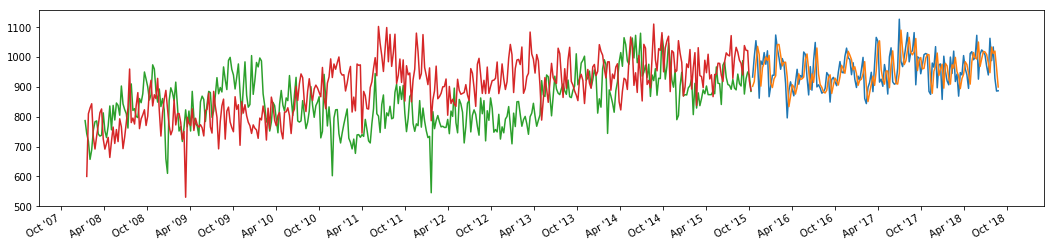

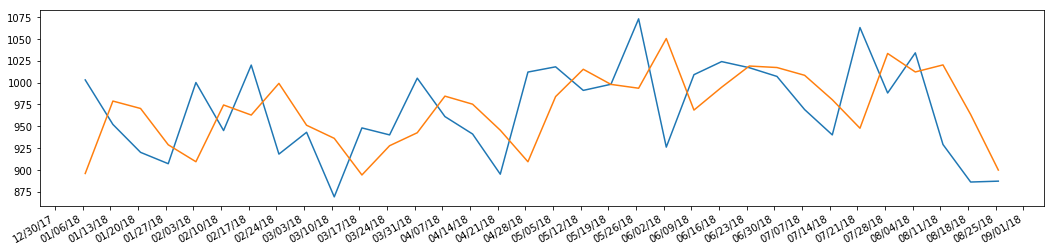

In [99]:
# frame a sequence as a supervised learning problem:  1 lag stationarity
np.random.seed(7)

def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0],  X.shape[1],1 )
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size,X.shape[1], X.shape[2]),stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1)
    return model

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1,1,len(X),)
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# transform data to be stationary
raw_values = dataset
diff_values = difference(raw_values, 1)

supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split into train and test sets
train, test = supervised_values[0:-150], supervised_values[-150:]

# normalize the dataset
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 150, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i+1]
    print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train = list()
for i in range(len(train_scaled)):
    # make one-step forecast
    X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
    yhat_train = forecast_lstm(lstm_model, 1, X_train)
    # invert scaling
    yhat_train = invert_scale(scaler, X_train, yhat_train)
    # invert differencing
    yhat_train = inverse_difference(raw_values, yhat_train, len(train_scaled)+1-i)
    # store forecast
    predictions_train.append(yhat_train)
    expected = series.values[i]
    
# report performance
trainScore = sqrt(mean_squared_error(raw_values[1:-150], predictions_train)) 
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(raw_values[-150:], predictions))
print('Test Score: %.3f RMSE' % (testScore))

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-') #test true
ax.plot_date(dfw.index[-150:],predictions, '-') #test predict
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',) # train 
ax.plot_date(dfw.index[1:-150],predictions_train, '-') #train predict !!!!!!
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()

#2018 Only
rule = rrulewrapper(WEEKLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-')
ax.plot_date(dfw.index[-34:],predictions[-34:], '-')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()

In [7]:
# LSTM with stacked timestep window regression framing and stationarity 1 -lag
np.random.seed(7)

def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0],  X.shape[1],1 )
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), 
                   stateful=True, return_sequences=True))
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1)
    return model

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1,  1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# transform data to be stationary
raw_values = dataset
diff_values = difference(raw_values, 1)

supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split into train and test sets
train, test = supervised_values[0:-150], supervised_values[-150:]

# normalize the dataset
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i+1]
    print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train = list()
for i in range(len(train_scaled)):
    # make one-step forecast
    X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
    yhat_train = forecast_lstm(lstm_model, 1, X_train)
    # invert scaling
    yhat_train = invert_scale(scaler, X, yhat_train)
    # invert differencing
    yhat_train = inverse_difference(raw_values, yhat_train, len(train_scaled)+1-i)
    # store forecast
    predictions_train.append(yhat_train)
    expected = series.values[i]
 

# report performance
trainScore = sqrt(mean_squared_error(raw_values[1:-150], predictions_train)) 
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(raw_values[-150:], predictions))
print('Test Score: %.3f RMSE' % (testScore))

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-') #test true
ax.plot_date(dfw.index[-150:],predictions, '-') #test predict
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',) # train 
ax.plot_date(dfw.index[1:-150],predictions_train, '-') #train predict !!!!!!
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()

#2018 Only
rule = rrulewrapper(WEEKLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-')
ax.plot_date(dfw.index[-34:],predictions[-34:], '-')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()


NameError: name 'dataset' is not defined

Week=1, Predicted=887.016189, Expected=933.000000
Week=2, Predicted=943.303227, Expected=1000.000000
Week=3, Predicted=983.933425, Expected=1055.000000
Week=4, Predicted=1001.379780, Expected=987.000000
Week=5, Predicted=938.965663, Expected=862.000000
Week=6, Predicted=870.028171, Expected=987.000000
Week=7, Predicted=1012.382313, Expected=975.000000
Week=8, Predicted=998.268481, Expected=1015.000000
Week=9, Predicted=991.673369, Expected=976.000000
Week=10, Predicted=959.189402, Expected=1021.000000
Week=11, Predicted=998.796380, Expected=867.000000
Week=12, Predicted=885.836312, Expected=903.000000
Week=13, Predicted=916.708359, Expected=939.000000
Week=14, Predicted=941.839730, Expected=939.000000
Week=15, Predicted=915.648203, Expected=1074.000000
Week=16, Predicted=1022.595431, Expected=1029.000000
Week=17, Predicted=987.764002, Expected=998.000000
Week=18, Predicted=983.886797, Expected=959.000000
Week=19, Predicted=994.817234, Expected=995.000000
Week=20, Predicted=1033.544173,

<Figure size 432x288 with 0 Axes>

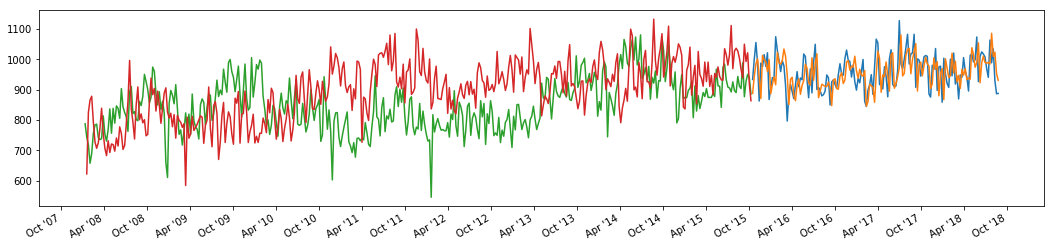

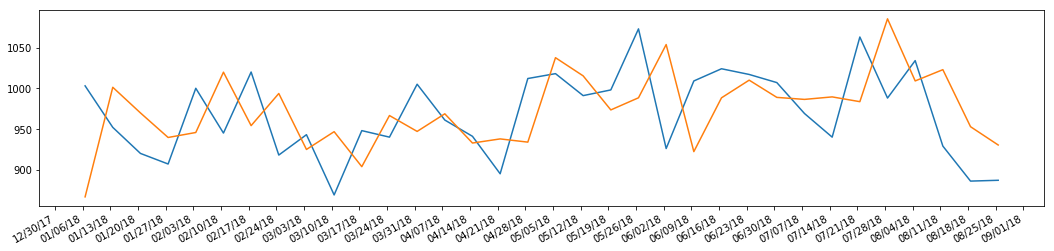

In [109]:
# frame a sequence as a stacked supervised learning problem 3 -lags
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1],  1)
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), 
                   stateful=True, return_sequences=True))
    model.add(LSTM(neurons, batch_input_shape=(batch_size,1, X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1)
    return model

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1,  len(X),1)
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# # transform data to be stationary
# raw_values = dataset
# diff_values = difference(raw_values, 1)

# supervised = timeseries_to_supervised(diff_values, 3)
# supervised_values = supervised.values

# # split into train and test sets
# train, test = supervised_values[0:-150], supervised_values[-150:]

# # normalize the dataset
# scaler, train_scaled, test_scaled = scale(train, test)

# # fit the model
# lstm_model = fit_lstm(train_scaled, 1, 100, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0:3].reshape(len(train_scaled), 3, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i+1]
    print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train = list()
for i in range(len(train_scaled)):
    # make one-step forecast
    X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
    yhat_train = forecast_lstm(lstm_model, 1, X_train)
    # invert scaling
    yhat_train = invert_scale(scaler, X_train, yhat_train)
    # invert differencing
    yhat_train = inverse_difference(raw_values, yhat_train, len(train_scaled)+1-i)
    # store forecast
    predictions_train.append(yhat_train)
    expected = series.values[i]
    
# report performance
trainScore = sqrt(mean_squared_error(raw_values[1:-150], predictions_train)) 
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(raw_values[-150:], predictions))
print('Test Score: %.3f RMSE' % (testScore))

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-') #test true
ax.plot_date(dfw.index[-150:],predictions, '-') #test predict
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',) # train 
ax.plot_date(dfw.index[1:-150],predictions_train, '-') #train predict !!!!!!
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()

#2018 Only
rule = rrulewrapper(WEEKLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots(figsize=(18,4))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-')
ax.plot_date(dfw.index[-34:],predictions[-34:], '-')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.autoscale_view()
fig.autofmt_xdate()
plt.show()


In [ ]:
yhat = forecast_lstm(lstm_model, 1, X)

In [104]:
weather2 = pd.read_csv('1452977.csv')
weather1 = pd.read_csv('1465173.csv')
weather = pd.concat([weather1,weather2])
weather['date'] = pd.to_datetime(weather['DATE'],infer_datetime_format=True)
mask1 = (weather['date'] >'2008-01-07') & (weather['date'] <'2018-08-26')
w = weather.loc[mask1] 
w = w[['date', 'HOURLYPrecip', 'HOURLYDRYBULBTEMPF']]
w['date'] = pd.to_datetime(w['date'].dt.date)

#Replacing values with "s" in them with NA
#Replacing "Trace" precipitation with 0
replacements = {
   'HOURLYDRYBULBTEMPF': {
      r'(.*s)': np.NaN,
      r'(\*)': np.NaN}
}
w.replace(replacements, regex=True, inplace=True)

replacements = {
   'HOURLYPrecip': {
      r'(.*s)': np.NaN,
    r'T': 0.00}
}
w.replace(replacements, regex=True, inplace=True)
w['temp'] = [float(x) for x in w['HOURLYDRYBULBTEMPF']]
w['prec'] = [float(x) for x in w['HOURLYPrecip']]
# wgroup = w.groupby('dateonly')['prec'].mean()
# wgroup = w.groupby('dateonly')['temp'].mean()
wgroup = w.groupby('date')['prec','temp'].mean()
wgroup['date']=wgroup.index
wgroupw = wgroup.resample('W').mean()
dfplus = dfw.join(wgroupw)
dfplus.interpolate(inplace=True)
dfplus

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,11,12,13,14,15,16,17,19,20,23,25,26,27,28,29,33,34,44,45,46,47,72,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26,27,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,number_crimes,prec,temp
date,,,
2008-01-13,787,0.008951,42.161250
2008-01-20,743,0.002260,37.983367
2008-01-27,718,0.001154,33.490916
2008-02-03,657,0.003296,38.048619
2008-02-10,689,0.006571,43.034533
2008-02-17,755,0.000179,43.063881
2008-02-24,783,0.000000,44.080252
2008-03-02,786,0.001662,47.138508
2008-03-09,742,0.000563,44.696328


In [110]:
# Multi - value
# frame a sequence as a supervised learning problemc
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
# scale train and test data to [-1, 1]

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:3], train[:, 3]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

#load data
dataset = dfplus.values
dataset = dataset.astype('float32')

# transform data to be supervised learning
supervised = timeseries_to_supervised(dataset, 1)
supervised = supervised.iloc[:,0:4]
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-150], supervised_values[-150:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0:3].reshape(len(train_scaled), 1, 3)
lstm_model.predict(train_reshaped, batch_size=1)
       
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:3], test_scaled[i, 3]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions.append(yhat)
	expected = series.values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train = list()
for i in range(len(train_scaled)):
	# make one-step forecast
	X_train, y_train = train_scaled[i, 0:3], train_scaled[i, 3]
	yhat_train = forecast_lstm(lstm_model, 1, X_train)
	# invert scaling
	yhat_train = invert_scale(scaler, X_train, yhat_train)
    
	# store forecast
	predictions_train.append(yhat_train)
	expected = series.values[i]

# report performance
trainScore = sqrt(mean_squared_error(series.values[:-150], predictions_train))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(series.values[-150:], predictions))
print('Test Score: %.3f RMSE' % (testScore))


Epoch 1/1
405/405 [==============================] - 5s 13ms/step - loss: 0.1479
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.1212
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.1122
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.1079
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.1049
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.1025
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.1002
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0979
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0954
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0929
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0902
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0874
Epoch 1/1
405/405 [====================

Day=120, Predicted=931.841370, Expected=907.000000
Day=121, Predicted=925.098633, Expected=1000.000000
Day=122, Predicted=947.318909, Expected=945.000000
Day=123, Predicted=930.901611, Expected=1020.000000
Day=124, Predicted=943.321838, Expected=918.000000
Day=125, Predicted=913.715881, Expected=943.000000
Day=126, Predicted=927.129639, Expected=869.000000
Day=127, Predicted=910.783630, Expected=948.000000
Day=128, Predicted=928.009460, Expected=940.000000
Day=129, Predicted=925.974243, Expected=1005.000000
Day=130, Predicted=943.377991, Expected=961.000000
Day=131, Predicted=942.972290, Expected=941.000000
Day=132, Predicted=942.522827, Expected=895.000000
Day=133, Predicted=922.619812, Expected=1012.000000
Day=134, Predicted=955.820496, Expected=1018.000000
Day=135, Predicted=961.690735, Expected=991.000000
Day=136, Predicted=961.993164, Expected=998.000000
Day=137, Predicted=964.398010, Expected=1073.000000
Day=138, Predicted=982.914062, Expected=926.000000
Day=139, Predicted=950.85